In [1]:
# imports
import random
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt

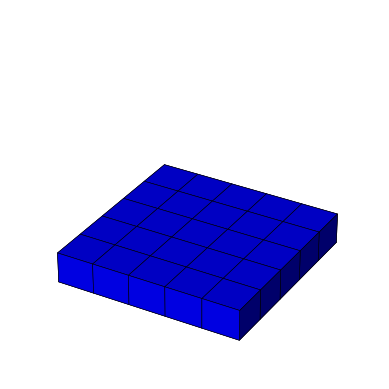

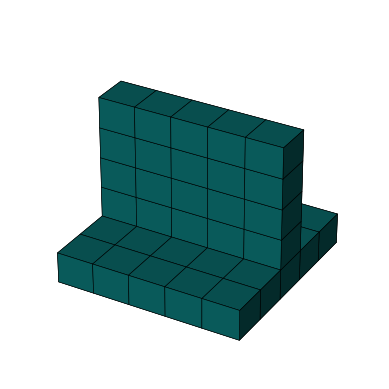

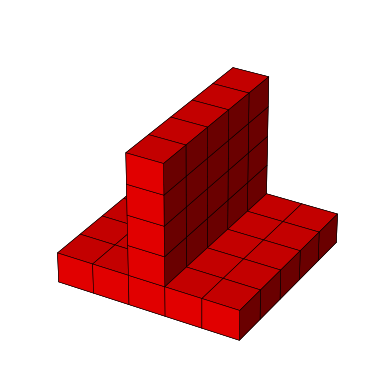

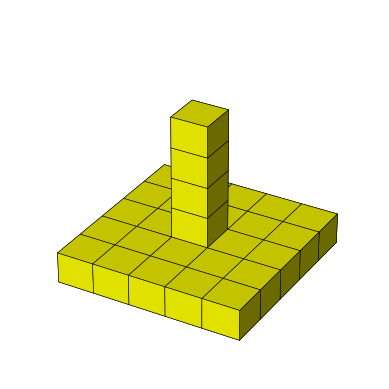

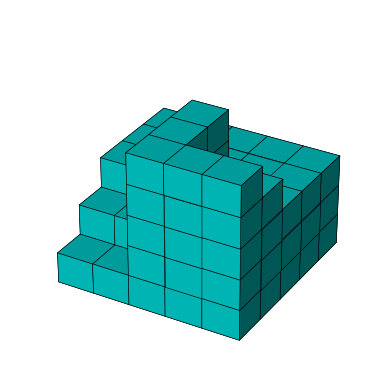

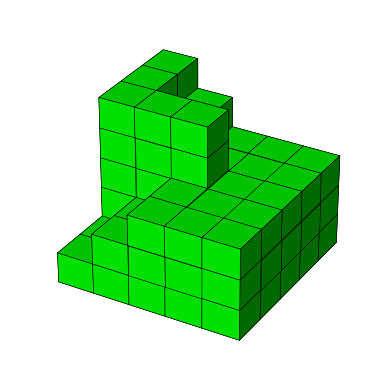

In [15]:
# create a set of tile, all inscribed into a 5x5x5 voxelspace
pX,pY,pZ = 5,5,5
tiles=[]
colors=[[0,0,0],[0,0,1],[0.04,0.4,0.4],[1,0,0],[1,1,0],[0,0.8,0.8],[0,1,0]]


#floor
voxel_states1=np.zeros((pX,pY,pZ),dtype=int)
voxel_states1[0:5,0:5,0:1]=1
tiles.append(voxel_states1)

#wallX
voxel_states2=np.zeros((pX,pY,pZ),dtype=int)
voxel_states2[0:5,0:5,0:1]=2
voxel_states2[0:5,2,0:5]=2
tiles.append(voxel_states2)

#wallY
voxel_states3=np.zeros((pX,pY,pZ),dtype=int)
voxel_states3[0:5,0:5,0:1]=3
voxel_states3[2,0:5,0:5]=3
tiles.append(voxel_states3)

#column
voxel_states4=np.zeros((pX,pY,pZ),dtype=int)
voxel_states4[0:5,0:5,0:1]=4
voxel_states4[2,2,0:5]=4
tiles.append(voxel_states4)

#stair1
voxel_states5=np.zeros((pX,pY,pZ),dtype=int)
voxel_states5[0:5,0:5,0:1]=5
voxel_states5[0:2,1,0:2]=5
voxel_states5[0:2,2,0:3]=5
voxel_states5[0:5,3:5,0:3]=5
voxel_states5[3:5,2,0:3]=5
voxel_states5[3:5,1,0:4]=5
voxel_states5[3:5,0,0:5]=5
voxel_states5[2,0:3,0:5]=5
tiles.append(voxel_states5)


#stair2 rotated through swapping axis x and y
voxel_states6=np.copy(voxel_states5)
voxel_states6=np.swapaxes(voxel_states6, 0, 1)
voxel_states6[voxel_states6 == 5] = 6
tiles.append(voxel_states6)


# visualise the  types
voxel_bools = np.zeros((pX,pY,pZ),dtype=bool)
voxel_colors=np.zeros((pX,pY,pZ,3))
for (i,tile) in enumerate(tiles):
    voxel_bools=tile==i+1
    voxel_colors[voxel_bools]=colors[i+1]

    # and plot everything
    ax = plt.figure().add_subplot(projection='3d')
    ax.voxels(voxel_bools, facecolors=voxel_colors, edgecolor='k',linewidth=0.4)
    plt.axis('off')
    plt.show()


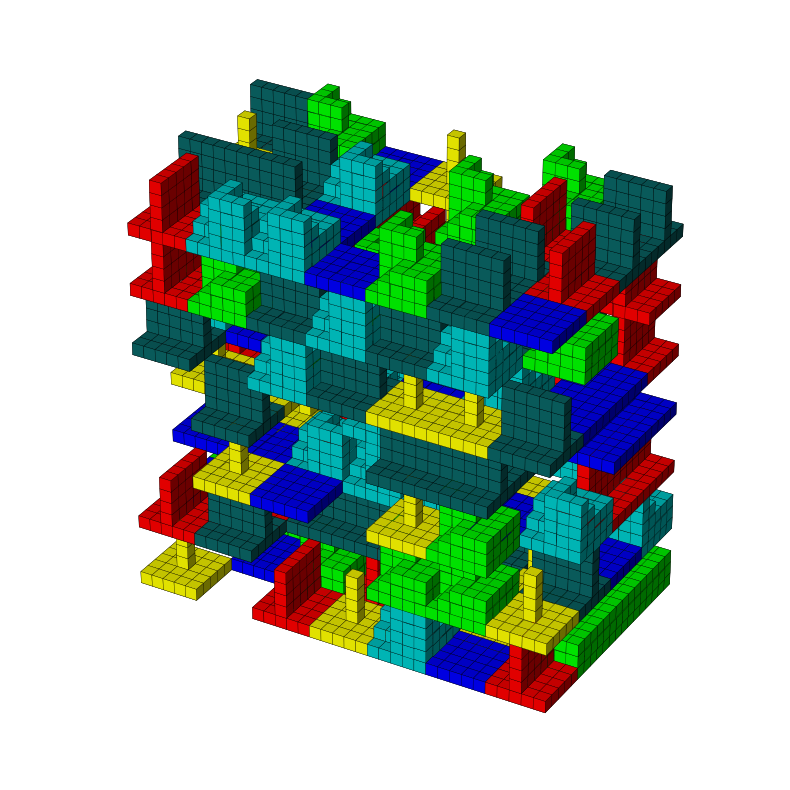

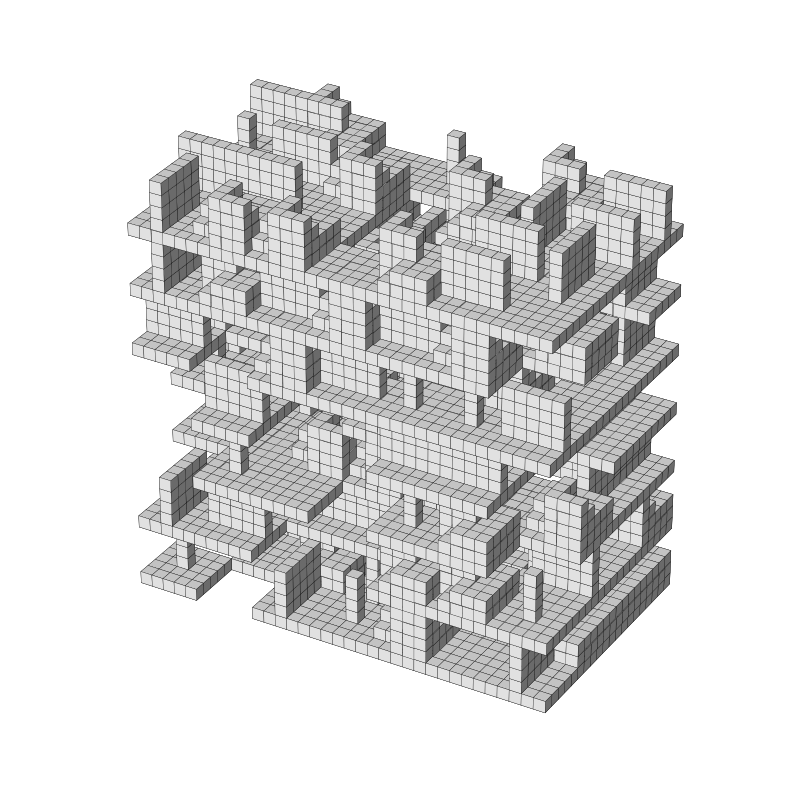

In [27]:
# visualiation
tX=7
tY=4
tZ=7
nX=5*tX
nY=5*tY
nZ=5*tZ

#place tiles. if index bigger then tile==empty 
tileGrid= np.zeros((tX,tY,tZ),dtype=int)
for x in range(tX):
    for y in range(tY):
        for z in range(tZ):
            rndType=np.random.randint(0,len(tiles)+1)
            tileGrid[x,y,z]=rndType

voxel_states = np.zeros((nX,nY,nZ),dtype=int)

#draw tiles in high res

for x in range(tX):
    for y in range(tY):
        for z in range(tZ):
            px=x*5
            py=y*5
            pz=z*5
            rndType=tileGrid[x,y,z]
            if (rndType<len(tiles)):
                randTile=tiles[rndType]
                voxel_states[px:px+5,py:py+5,pz:pz+5]=randTile
voxel_bools = np.zeros((nX,nY,nZ),dtype=bool)
voxel_bools[voxel_states>0]=True

voxel_colors = np.zeros((nX,nY,nZ,3))
for x,y,z in np.ndindex(voxel_states.shape):
    voxel_colors[x,y,z]=colors[voxel_states[x,y,z]]
# and plot everything
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.voxels(voxel_bools, facecolors=voxel_colors, edgecolor='k', linewidth=0.2)
ax.set_aspect('equal')
plt.axis('off')
plt.show()


#draw in white
voxel_colors = np.zeros((nX,nY,nZ,3))
voxel_colors.fill(1)

# and plot everything
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.voxels(voxel_bools, facecolors=voxel_colors, edgecolor='k', linewidth=0.2)
ax.set_aspect('equal')
plt.axis('off')
plt.show()